In [3]:
import pandas as pd, numpy as np, seaborn as sns;
import matplotlib.pyplot as plt;
import sklearn;
from sklearn.tree import DecisionTreeClassifier as DTC;
from sklearn.model_selection import cross_val_predict;
from sklearn.metrics import classification_report;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.neighbors import LocalOutlierFactor;
from sklearn.model_selection import cross_validate;
from sklearn.preprocessing import KBinsDiscretizer;

import warnings;
warnings.filterwarnings('ignore')

In [21]:
music_data = pd.read_csv(r"..\data\Data\features_30_sec.csv")
music_data = music_data[['filename','label','chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var','tempo']]
music_data.head()

numeric_data = music_data.select_dtypes(include=['int64','float64'])
cat_data = music_data.select_dtypes(exclude=['int64','float64'])


In [16]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   label                    1000 non-null   object 
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [24]:
music_data.describe()
cat_data.describe()

,filename,label
count,1000,1000
unique,1000,10
top,blues.00000.wav,blues
freq,1,100


In [19]:
print(music_data.isnull().sum()/len(music_data)*100)


filename                   0.0
label                      0.0
chroma_stft_mean           0.0
chroma_stft_var            0.0
rms_mean                   0.0
rms_var                    0.0
spectral_centroid_mean     0.0
spectral_centroid_var      0.0
spectral_bandwidth_mean    0.0
spectral_bandwidth_var     0.0
rolloff_mean               0.0
rolloff_var                0.0
zero_crossing_rate_mean    0.0
zero_crossing_rate_var     0.0
harmony_mean               0.0
harmony_var                0.0
tempo                      0.0
dtype: float64


Text(0.5, 0, 'Genre')

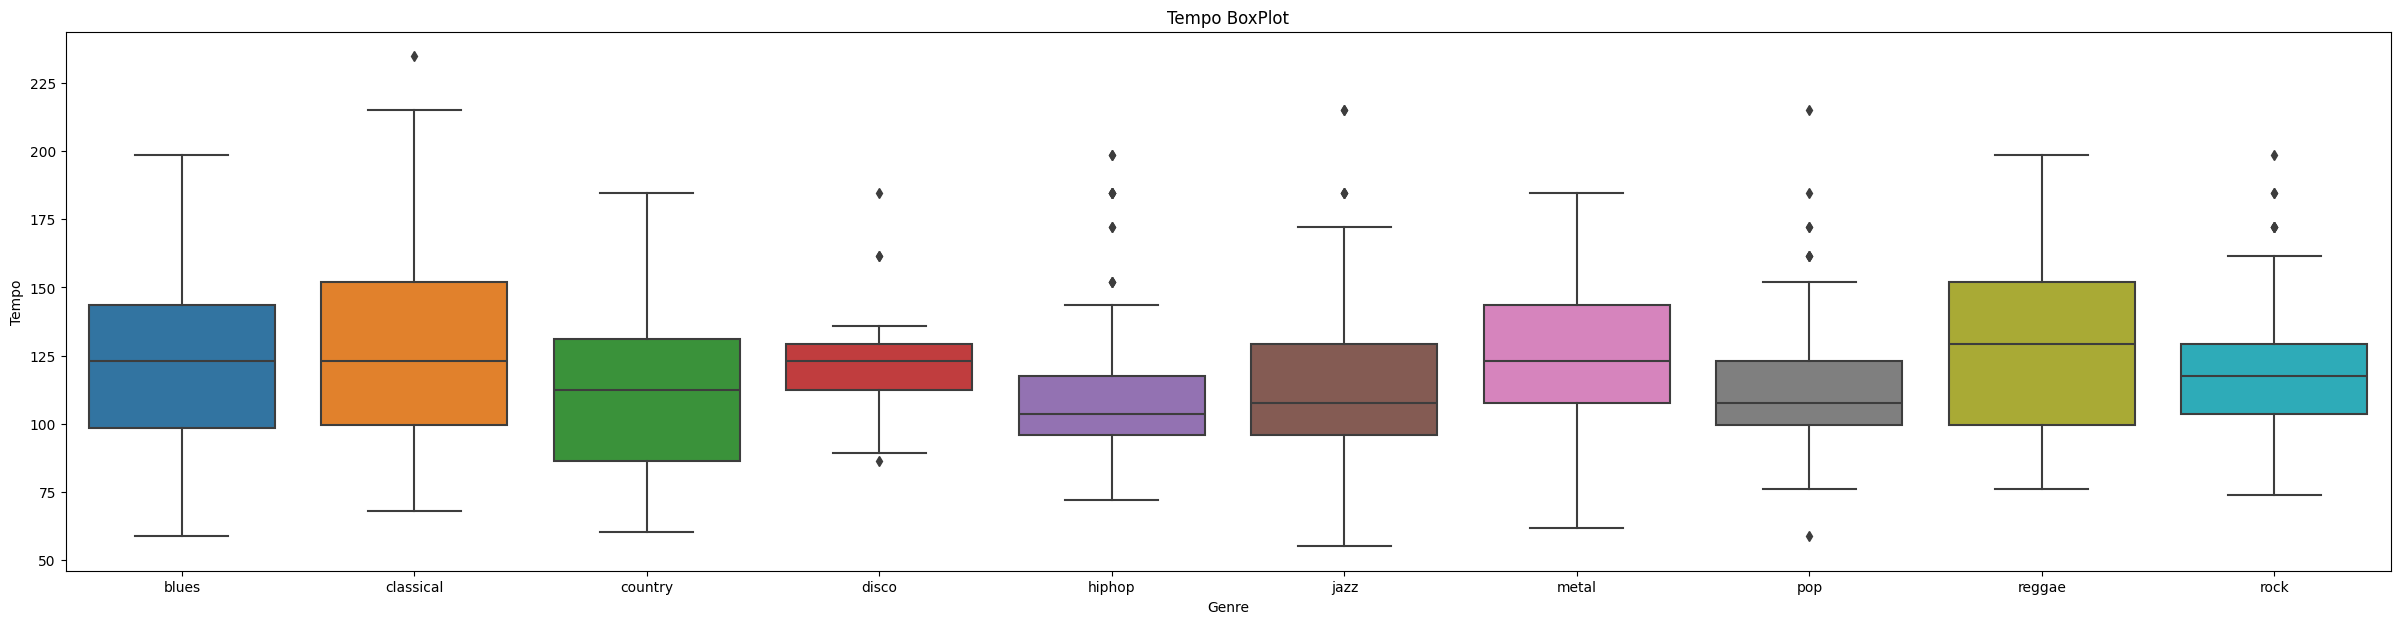

In [40]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "tempo", data = music_data[["label", "tempo"]]);
plt.title('Tempo BoxPlot')
plt.ylabel("Tempo")
plt.xlabel("Genre")
